In [70]:
import pandas as pd
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import random

random.seed(1234)

### Fake Data
- 8 characters that iterate through the alphabet, equal distribution
- Some random feature extraction

In [71]:
alphabet = "ABCD"
rows = []

def prod(l):
     yield from itertools.product(*([l] * 4)) 

col = [''.join(x) for x in prod(alphabet)]

for x in col:
    for i in range(random.randint(0, 3)):
        if random.randint(0, 10) <= 5: 
            x += random.choice(alphabet)
    row = {
        "data":x,
        "types":len(set(x)),
        "value":sum([ord(chr) for chr in x]),
        "fpl_value":ord(x[0]) + ord(x[-1]),
        "l2_value":ord(x[-1]) + ord(x[-2]),
    }
    
    for a in alphabet:
        row["count_{}".format(a)] = x.count(a)
    
    
    rows.append(row)
df = pd.DataFrame(rows)

In [72]:
df

,data,types,value,fpl_value,l2_value,count_A,count_B,count_C,count_D
0,AAAAAA,1,390,130,130,6,0,0,0
1,AAAB,2,261,131,131,3,1,0,0
2,AAAC,2,262,132,132,3,0,1,0
3,AAADAA,2,393,130,130,5,0,0,1
4,AABA,2,261,130,131,3,1,0,0
...,...,...,...,...,...,...,...,...,...
251,DDCDAAC,3,468,135,132,2,0,2,3
252,DDDADC,3,404,135,135,1,0,1,4
253,DDDBC,3,337,135,133,0,1,1,3
254,DDDC,2,271,135,135,0,0,1,3


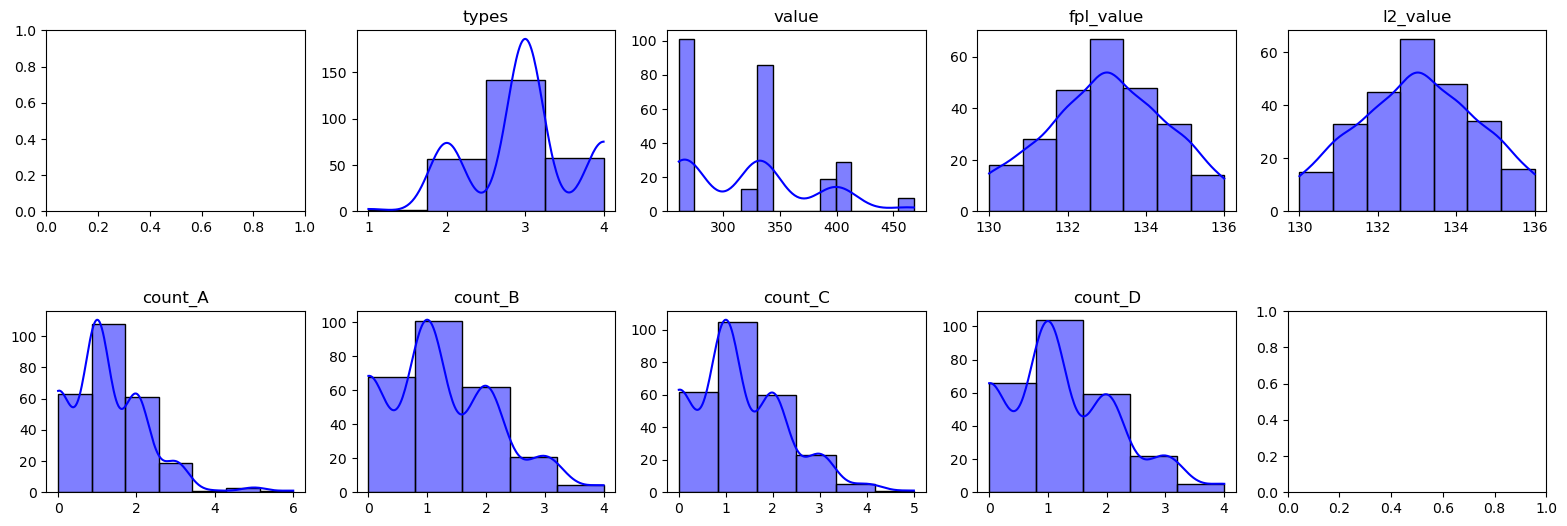

In [73]:

def data_viz(df):
    blacklist = ["data"]
    fig = plt.figure(figsize=(8,6))
    gs = gridspec.GridSpec(2, 5, right=2, hspace=0.55)
    axs = []
    for y in range(2):
        for x in range(5):
            ax = fig.add_subplot(gs[y, x])
            axs.append(ax)
            col = df.columns[((y*5) + x) % len(df.columns)]
            if col in blacklist: continue
            if len(df[ col ].value_counts()) == 2:
                g = sns.barplot(x=[0, 1], y=[ len(df[df[col] == 0]), len(df[df[col] == 1])], color="#AF5252", ax=ax,edgecolor="0")
            else:
                bins = len(df[col].unique())
                if bins > 15: bins = 15
                g = sns.histplot(df[ col ], kde=True, bins=bins, color='blue', ax=ax)
            g.set(ylabel=None, xlabel=None)
            g.set_title(col)
    plt.show()

data_viz(df)

In [61]:
df["value"].unique()

array([260, 261, 262, 331, 394, 329, 330, 396, 463, 263, 398, 265, 264,
       334, 327, 332, 266, 333, 267, 399, 335, 328, 268, 337, 461, 269,
       401, 336, 270, 393, 395, 466, 400, 402, 271, 397, 338, 272])